In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string 
import nltk
import warnings
warnings.filterwarnings("ignore" , category=DeprecationWarning)
%matplotlib inline

In [8]:

train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

train_original=train.copy()

In [9]:
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

test_original=test.copy()

In [10]:
combine = train._append(test,ignore_index=True,sort=True)

In [11]:
combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [14]:
def remove_pattern(text,pattern):
    r=re.findall(pattern,text)
    for i in r:
        text=re.sub(i,"",text)
        return text

In [22]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,None
3,4,0.0,#model i love u take with u all the time in ...,None
4,5,0.0,factsguide: society now #motivation,None


In [23]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can't, use, ca...
2                                               [None]
3                                               [None]
4                                               [None]
Name: Tidy_Tweets, dtype: object

In [24]:
 from nltk import PorterStemmer
ps = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])
tokenized_tweet.head()

0    [when, a, father, is, dysfunct, and, is, so, s...
1    [thank, for, #lyft, credit, i, can't, use, cau...
2                                               [none]
3                                               [none]
4                                               [none]
Name: Tidy_Tweets, dtype: object

In [21]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]= ' '.join(tokenized_tweet[i])
combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunct and is so selfish he...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit i can't use caus they d...
2,3,0.0,bihday your majesty,none
3,4,0.0,#model i love u take with u all the time in ...,none
4,5,0.0,factsguide: society now #motivation,none


In [25]:
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image
import urllib
import requests

In [27]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])


In [29]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)


wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)


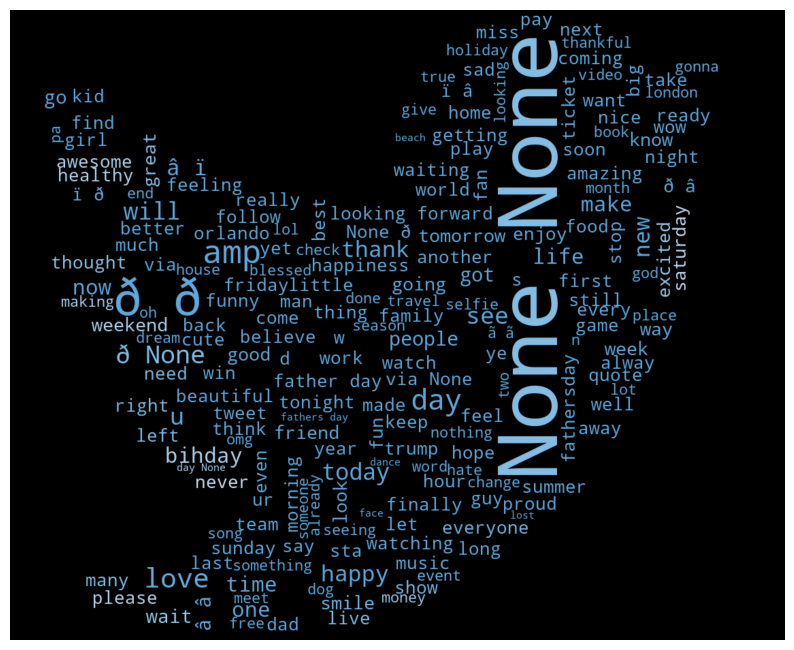

In [31]:
plt.figure(figsize=(10,20))


plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [32]:

def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [33]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])

ht_positive

[['run'],
 ['lyft', 'disapointed', 'getthanked'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['gr8'],
 [],
 [],
 [],
 [],
 [],
 ['friday', 'cookies'],
 [],
 [],
 [],
 [],
 ['tgif', 'ff', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 [],
 ['smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback'],
 [],
 [],
 [],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian'],
 [],
 [],
 [],
 [],
 ['photoshop',
  'enoughisenough',
  'dontphotoshopeverything',
  'wheresallthenaturalphotos'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['bihday', 'nose', 'job', 'bihday', 'petunia'],
 ['albanpilgrimage'],
 [],
 ['wedding'],
 [],
 [],
 ['ascot', 'fashion', 'monochrome', 'style', 'instahappyday'],
 [],
 [],
 ['christinarip', 'voice', 'christinagrimmie'],
 [],
 [],
 [],
 ['chatiado'],
 [],
 [],
 [],
 ['luv', 'hottweets', 'venusexchangeâ'],
 [],
 [],
 [],
 [],
 [],
 ['senseaboutmaths'],
 [],
 [],
 ['greathonour', 'careerconvos'],
 ['innovative', 'wate

In [34]:
ht_positive_unnest = sum(ht_positive,[])

In [35]:

ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])

ht_negative

[['cnn', 'michigan', 'tcot'],
 [],
 [],
 [],
 [],
 ['love', 'peace'],
 [],
 ['race', 'identity', 'medâ'],
 [],
 ['linguistics', 'race', 'power', 'raciolinguistics'],
 ['brexit'],
 [],
 [],
 [],
 ['jewishsupremacist'],
 [],
 ['trash', 'hate'],
 [],
 ['â'],
 [],
 [],
 [],
 ['antisemitism', 'hocoschools', 'columbiamd', 'hocomd'],
 ['nazi', 'hatred', 'bigotry'],
 [],
 [],
 ['topoli'],
 ['blacklivesmatter'],
 [],
 ['biherism', 'bigotry', 'altright', 'potus', 'theresistance'],
 [],
 [],
 [],
 ['allahsoil'],
 [],
 ['praised', 'cleveland', 'rnc', 'white', 'tamirrice', 'rip'],
 ['bigot'],
 [],
 ['blacklivesmatter'],
 ['feminismiscancer', 'feminismisterrorism', 'feminismmuktbharat', 'malevote'],
 [],
 ['prowar', 'anti', 'islamic', 'homophobic', 'rapist', 'hypocrite'],
 [],
 ['latesnews'],
 [],
 [],
 [],
 [],
 ['fakenewsale'],
 [],
 ['trump', 'hate', 'putin', 'trump'],
 [],
 [],
 [],
 ['social', 'media', 'aande'],
 ['eod'],
 ['trump', 'vile', 'bigoted', 'his', 'surrogate', 'carlpaladino', 'endhat

In [36]:
ht_negative_unnest = sum(ht_negative,[])

In [37]:

word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'love': 357, 'smile': 121, 'life': 107, 'bihday': 95, 'fathersday': 91, 'fun': 90, 'summer': 82, 'friends': 80, 'happiness': 70, 'cute': 70, ...})

In [38]:

df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

df_positive.head(10)

,Hashtags,Count
0,run,9
1,lyft,1
2,disapointed,1
3,getthanked,2
4,gr8,1
5,friday,65
6,cookies,2
7,tgif,29
8,ff,27
9,gamedev,22


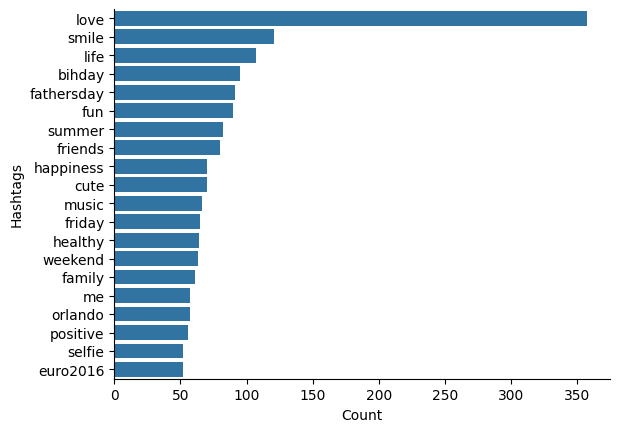

In [39]:

df_positive_plot = df_positive.nlargest(20,columns='Count')

sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [40]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

word_freq_negative

FreqDist({'allahsoil': 83, 'trump': 56, 'politics': 43, 'sjw': 42, 'libtard': 42, 'liberal': 41, 'malevote': 24, 'bigot': 22, 'hate': 21, 'feminismiscancer': 20, ...})

In [41]:

df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

df_negative.head(10)

,Hashtags,Count
0,cnn,2
1,michigan,1
2,tcot,8
3,love,6
4,peace,4
5,race,12
6,identity,1
7,medâ,1
8,linguistics,1
9,power,1


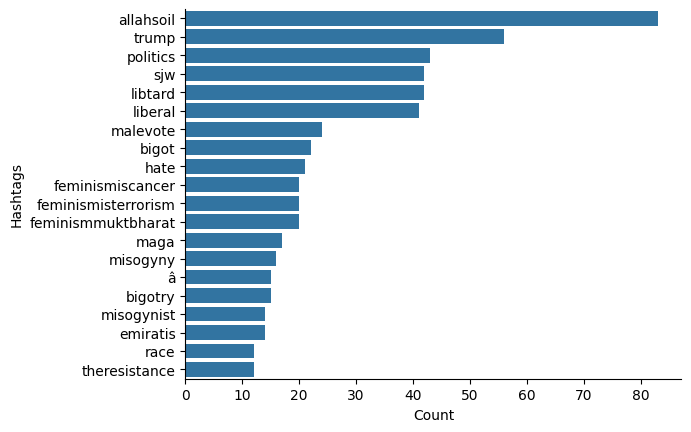

In [42]:

df_negative_plot = df_negative.nlargest(20,columns='Count') 

sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()